In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out 
    
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a * b + c
print(d)

Value(data=4.0)


In [3]:
# missing is the connective tissue of this expression
# building the graph
# keep pointers about what values produce what other values

class Value:

    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children) # For leaf node its empty set

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other)) # two operands are children
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other)) # two operands are children
        return out
    
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a * b + c
print(d._prev)

{Value(data=-6.0), Value(data=10.0)}


In [4]:
# need to know what operation create the value

class Value:

    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self._prev = set(_children) 
        self._op = _op # For leaf node its empty string
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+') # add operator
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*') # multiply operator
        return out
    
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a * b + c
print(d._prev)
print(d._op)

{Value(data=10.0), Value(data=-6.0)}
+


In [5]:
# Visualization
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f}" % (n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


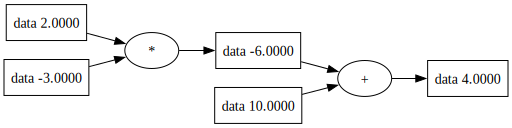

In [6]:
draw_dot(d)

In [7]:
# Add labels

class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+') # add operator
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*') # multiply operator
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'

In [8]:
# Visualization
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f}" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


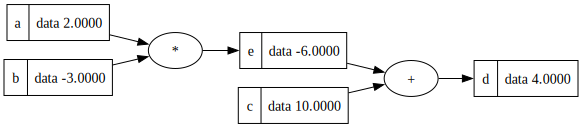

In [9]:
draw_dot(d)

In [10]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
print(L)

Value(data=-8.0)


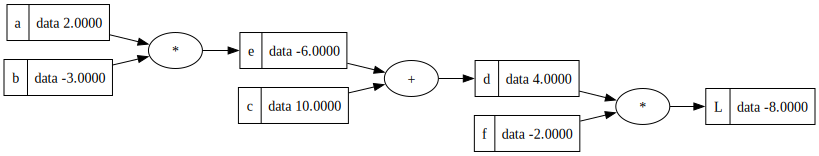

In [11]:
# Visualize the forward pass
draw_dot(L)

In [12]:
# Reverse and calculate the gradient 
# a,b,c,f can be weights in neural network and interested in how these weights impact the loss function

In [13]:
# implementing gradient
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+') # add operator
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*') # multiply operator
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
print(L)

Value(data=-8.0)


In [14]:
# Visualization the grad
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


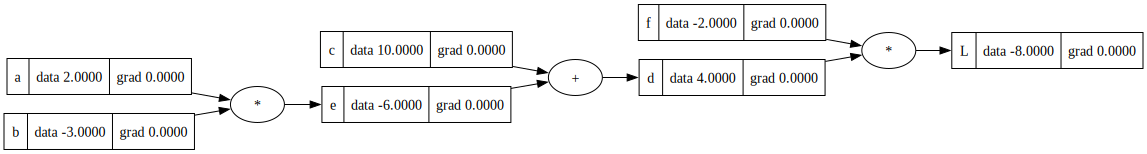

In [15]:
# initialized grad at 0
draw_dot(L)

In [16]:
# Filling the gradient from the back
# gradient of L?
def lol():
    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    # L2 = L.data + h
    print((L2 - L1)/h)

lol()
    

6.000000000021544


In [17]:
# manual backpropagation
L.grad = 1
# L = d*f what is dL/dd = ?, answer is f
d.grad = -2
f.grad = 4

# Chain rules for gradient of c and e 
# d = c + e, local derivative dd/dc = 1, dd/de = 1
# we want dL/dc.  

Chain rule
$$\large{\frac{d}{dx}(f(g(x)))=f'(g(x))g'(x)}.$$

$$\frac{dL}{{dx}} = \frac{dL}{{dy}} \frac{{dy}}{{dx}}$$

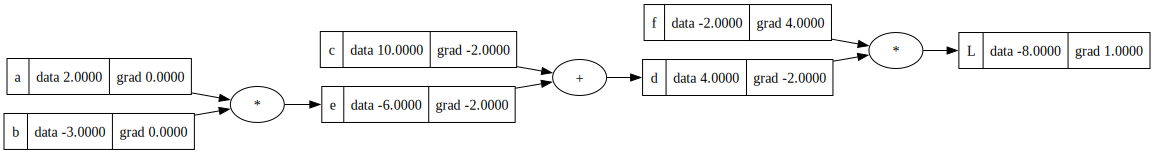

In [18]:
# we want dL/dc.  
# dL/dc = (dL/dd) * (dd/dc)
c.grad = d.grad * 1 # dL/dc
e.grad = d.grad * 1 # dL/de
# + node routes the gradient
draw_dot(L)
# can verify the gradient with lol() 

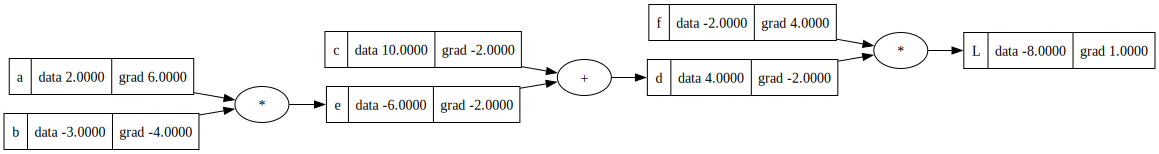

In [19]:
# e = a*b
# dL/da = dL/de * de/da
b.grad = a.data * e.grad
a.grad = b.data * e.grad
draw_dot(L)

In [20]:
# if we want L to go up, increase in the direction of gradient 
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad
# rerun the forward pass
e = a * b
d = e + c
L = d*f
# L becomes less negative
print(L.data)

-7.286496


# Backpropagate a neuron
![Analogus of Perceptron to Neuron](Perceptron.png)

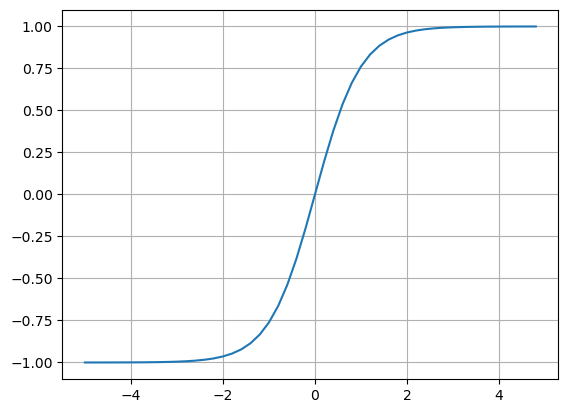

In [21]:

# Shape of tanh
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

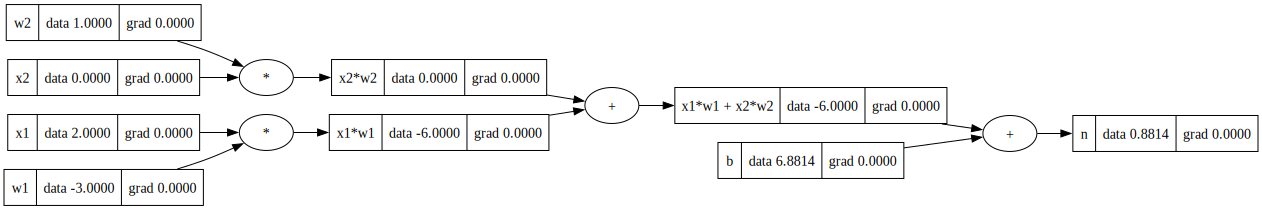

In [22]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

draw_dot(n)


In [23]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'


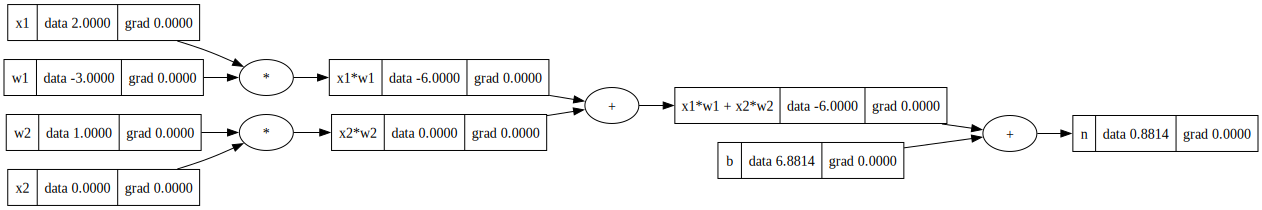

In [24]:
draw_dot(n)

$$ tanh(x) = \frac{exp(x) - exp(-x)}{exp(x) + exp(-x)} = \frac{exp(2x) - 1}{exp(2x) + 1}$$

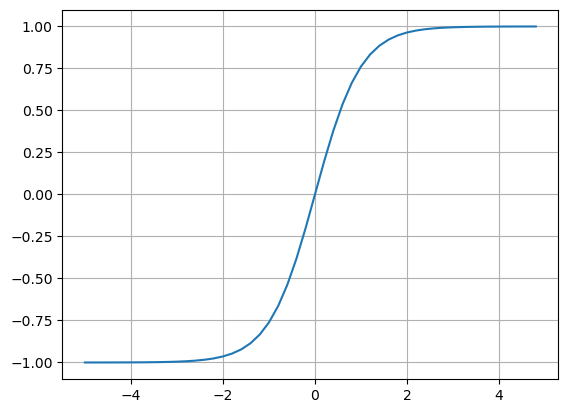

In [25]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [26]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

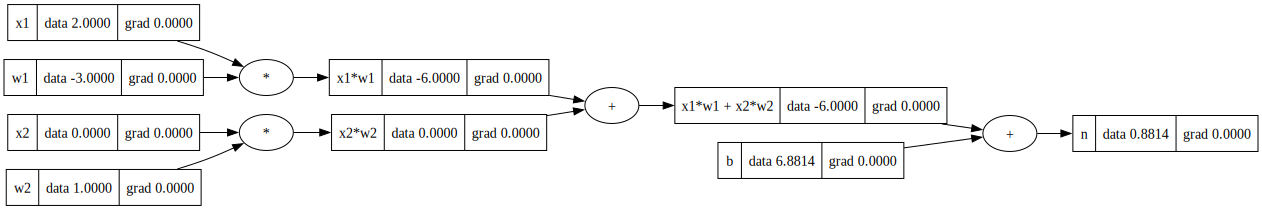

In [27]:
draw_dot(n)

In [28]:
# implementing gradient
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+') # add operator
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*') # multiply operator
        return out
    
    # To implment tanh(), we can either use the most atomic computation or abstraction as long as we can calculate local derivative
    def exp(self):
        pass

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')  # Only one child
        return out


In [29]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'



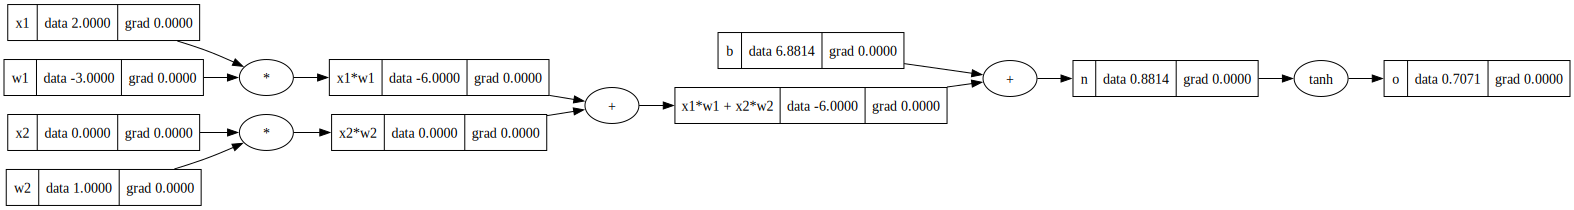

In [30]:
draw_dot(o)

In [31]:
# Do backpropagation manually
# Calculate the gradient of weights as we are going to learn the weights
o.grad = 1.0

$$\large{\frac{d}{dx}(tanh(x))= 1-tanh^2(x)}$$

In [32]:
#do/dn = 1 - o**2
n.grad = 1 - o.data**2 # 0.5
print(n.grad)

0.4999999999999999


In [33]:
# plus just flow the gradient
x1w1x2w2.grad = n.grad # 0.5
b.grad = n.grad # 0.5

In [34]:
x1w1.grad = x1w1x2w2.grad # 0.5
x2w2.grad = x1w1x2w2.grad # 0.5

In [35]:
x2.grad = w2.data * x2w2.grad 
# why w2.grad = 0? No matter how I change w2, there is no impact to the output since x2 is 0
w2.grad = x2.data * x2w2.grad # 0

In [36]:
x1.grad = w1.data * x1w1.grad 
# why w2.grad = 0? No matter how I change w2, there is no impact to the output since x2 is 0
w1.grad = x1.data * x1w1.grad # 0

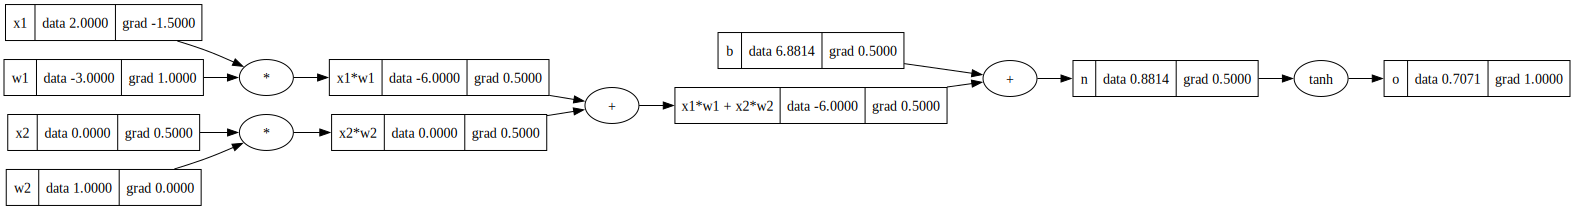

In [37]:
draw_dot(o)

In [38]:
# Implement the backpropagation automatically

# implementing gradient
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._backward = lambda:None # By the default empty function, for example leaf node 
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+') # add operator
        
        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*') # multiply operator

        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out
    
    # To implment tanh(), we can either use the most atomic computation or abstraction as long as we can calculate local derivative
    def exp(self):
        pass

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')  # Only one child

        def _backward():
            # self.grad = ???
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward

        return out


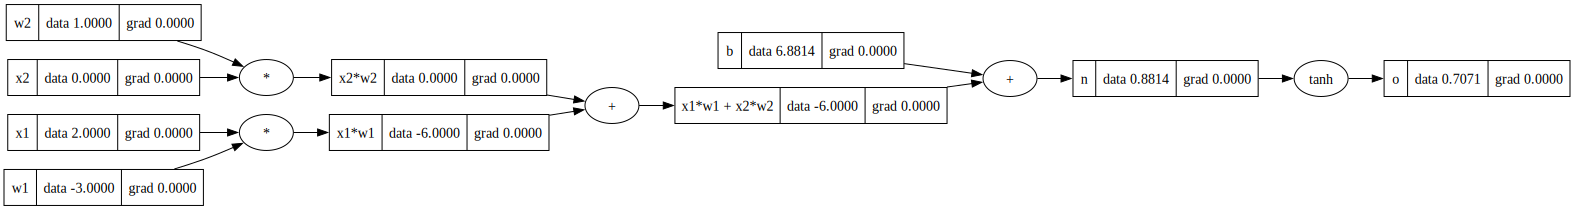

In [39]:
# redefine value nodes to have the backward capability
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [40]:
o.grad = 1.0
o._backward()

In [41]:
n._backward()

In [42]:
b._backward() # leaf node, nothing will happen
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()


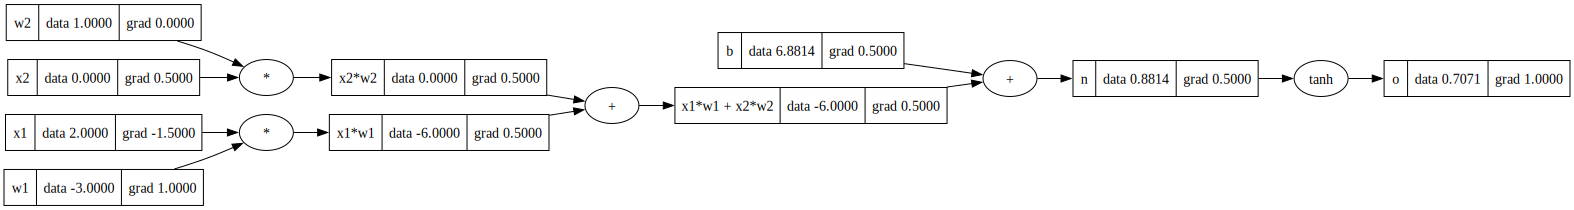

In [43]:
draw_dot(o)

In [44]:
# topological sort so that nodes are from left to right
# start from o


topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v) # add the node itself before all the children are processed
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

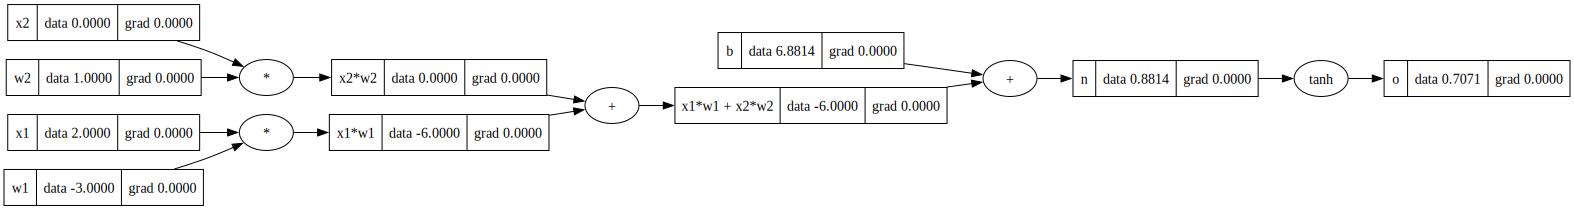

In [47]:
# redefine value nodes to have the backward capability
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [52]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v) # add the node itself before all the children are processed
build_topo(o)
topo
o.grad = 1.0
for node in reversed(topo):
    node._backward()

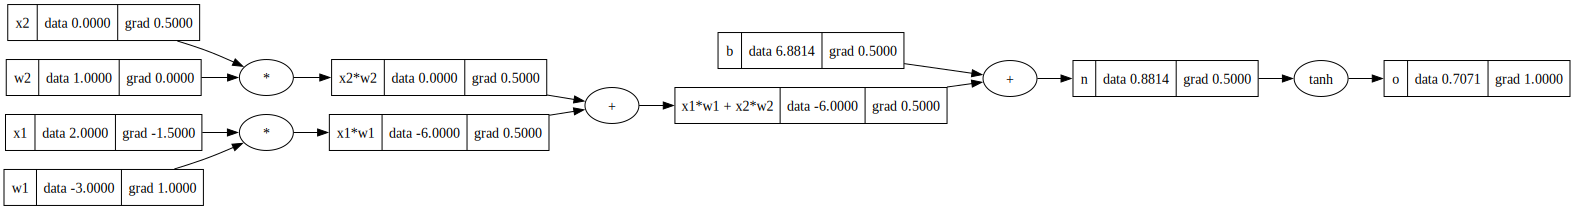

In [53]:
draw_dot(o)

In [61]:
# Implement the backpropagation automatically

# implementing gradient
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._backward = lambda:None # By the default empty function, for example leaf node 
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+') # add operator
        
        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*') # multiply operator

        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out
    
    # To implment tanh(), we can either use the most atomic computation or abstraction as long as we can calculate local derivative
    def exp(self):
        pass

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')  # Only one child

        def _backward():
            # self.grad = ???
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v) # add the node itself before all the children are processed
        
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

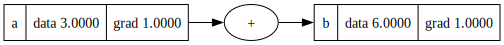

In [62]:
# A hidden bug
# self.grad and other.grad value is overriden instead of accumulate
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.grad = 1.0
b.backward()
draw_dot(b)

In [ ]:
# Implement the backpropagation automatically

# implementing gradient
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._backward = lambda:None # By the default empty function, for example leaf node 
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+') # add operator
        
        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += 1 * out.grad # +=
            other.grad += 1 * out.grad

        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other),'*') # multiply operator

        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    # To implment tanh(), we can either use the most atomic computation or abstraction as long as we can calculate local derivative
    def exp(self):
        pass

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')  # Only one child

        def _backward():
            # self.grad = ???
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v) # add the node itself before all the children are processed
        
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [63]:
# Another issue

a = Value(2.0)
a + 1

AttributeError: 'int' object has no attribute 'data'

In [ ]:
# implement tanh with automic operation

class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._backward = lambda:None # By the default empty function, for example leaf node 
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # solve a + 2
        out = Value(self.data + other.data, (self, other),'+') # add operator
        
        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += 1 * out.grad # +=
            other.grad += 1 * out.grad

        out._backward = _backward

        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other),'*') # multiply operator

        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    # To implment tanh(), we can either use the most atomic computation or abstraction as long as we can calculate local derivative
    def exp(self):
        pass

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')  # Only one child

        def _backward():
            # self.grad = ???
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v) # add the node itself before all the children are processed
        
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [64]:
# yet another bug

a = Value(2.0)
2*a 

TypeError: unsupported operand type(s) for *: 'int' and 'Value'

In [68]:
# implement tanh with automic operation

class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._backward = lambda:None # By the default empty function, for example leaf node 
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # solve a + 2
        out = Value(self.data + other.data, (self, other),'+') # add operator
        
        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += 1 * out.grad # +=
            other.grad += 1 * out.grad

        out._backward = _backward

        return out
    
    def __radd__(self, other): # handle other + self
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other),'*') # multiply operator

        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __rmul__(self, other): # handle other*self
        return self * other

    def exp(self):
        pass

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh') 

        def _backward():
            # self.grad = ???
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [69]:
# yet another bug

a = Value(2.0)
2+a 

Value(data=4.0)

In [ ]:
# implement exponential

class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._backward = lambda:None # By the default empty function, for example leaf node 
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # solve a + 2
        out = Value(self.data + other.data, (self, other),'+') # add operator
        
        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += 1 * out.grad # +=
            other.grad += 1 * out.grad

        out._backward = _backward

        return out
    
    def __radd__(self, other): # handle other + self
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other),'*') # multiply operator

        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __rmul__(self, other): # handle other*self
        return self * other

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            # self.grad = ???
            self.grad += out.data * out.grad
        out._backward = _backward

        return out


    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh') 

        def _backward():
            # self.grad = ???
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [72]:
# implement division as power of -1

# implement exponential

class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._backward = lambda:None # By the default empty function, for example leaf node 
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # solve a + 2
        out = Value(self.data + other.data, (self, other),'+') # add operator
        
        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += 1 * out.grad # +=
            other.grad += 1 * out.grad

        out._backward = _backward

        return out
    
    def __radd__(self, other): # handle other + self
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other),'*') # multiply operator

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __rmul__(self, other): # handle other*self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)) , "Only supporting int and float"
        out = Value(self.data ** other, (self,), f'**{other}' )

        def _backward():
            self.grad += other * self.data ** (other-1) * out.grad
        out._backward = _backward    
        return out
    
    def __truediv__(self, other): # self / other
        return self * other**-1

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out


    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh') 

        def _backward():
            # self.grad = ???
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [73]:
a = Value(2.0)
b = Value(4.0)
a / b

Value(data=0.5)

In [74]:
# implement subtraction

class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # by default
        self._backward = lambda:None # By the default empty function, for example leaf node 
        self._prev = set(_children) 
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # solve a + 2
        out = Value(self.data + other.data, (self, other),'+') # add operator
        
        def _backward():
            # self.grad = ???
            # other.grad = ???
            self.grad += 1 * out.grad # +=
            other.grad += 1 * out.grad

        out._backward = _backward

        return out
    
    def __radd__(self, other): # handle other + self
        return self + other
    
    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other),'*') # multiply operator

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __rmul__(self, other): # handle other*self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)) , "Only supporting int and float"
        out = Value(self.data ** other, (self,), f'**{other}' )

        def _backward():
            self.grad += other * self.data ** (other-1) * out.grad
        out._backward = _backward    
        return out
    
    def __truediv__(self, other): # self / other
        return self * other**-1

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out


    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh') 

        def _backward():
            # self.grad = ???
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [75]:
a = Value(2.0)
b = Value(4.0)
a - b

Value(data=-2.0)

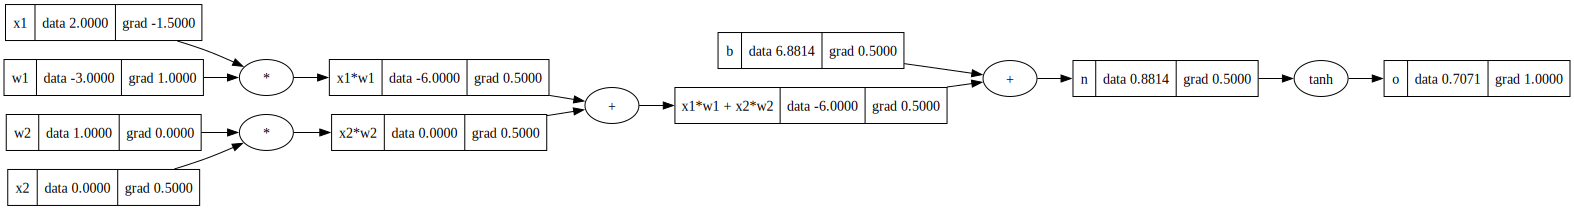

In [79]:

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)

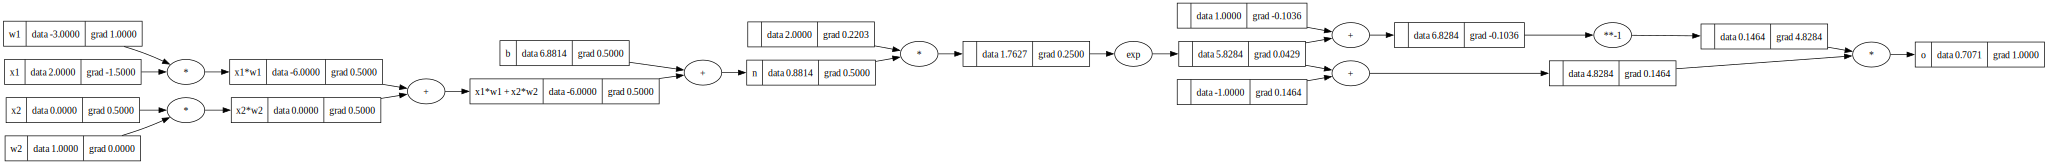

In [78]:
# You can use different level of substractions
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#----
e = (2*n).exp()
o = (e - 1)/(e + 1)
#----
o.label = 'o'
o.backward()
draw_dot(o)

In [80]:
import torch
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

e:\anaconda3r\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [81]:
import random
class Neuron:
  
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  # explain call
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # explain zip, take two iterators and produce one iterator, sum can take an argument for initial value
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

x = [2.0, 3.0]
n = Neuron(2)

n(x)


Value(data=-0.9777035107740581)

In [83]:
class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)] # a list of neurons
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]


In [84]:
x = [2.0, 3.0]
n = Layer(2, 3)

n(x)

[Value(data=-0.9873572432398601),
 Value(data=-0.998930666818634),
 Value(data=0.7355797983273834)]

In [87]:

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [89]:
x = [2.0, 3.0, -1]
n = MLP(3, [4,4,1])

n(x)

Value(data=0.9125268487564145)

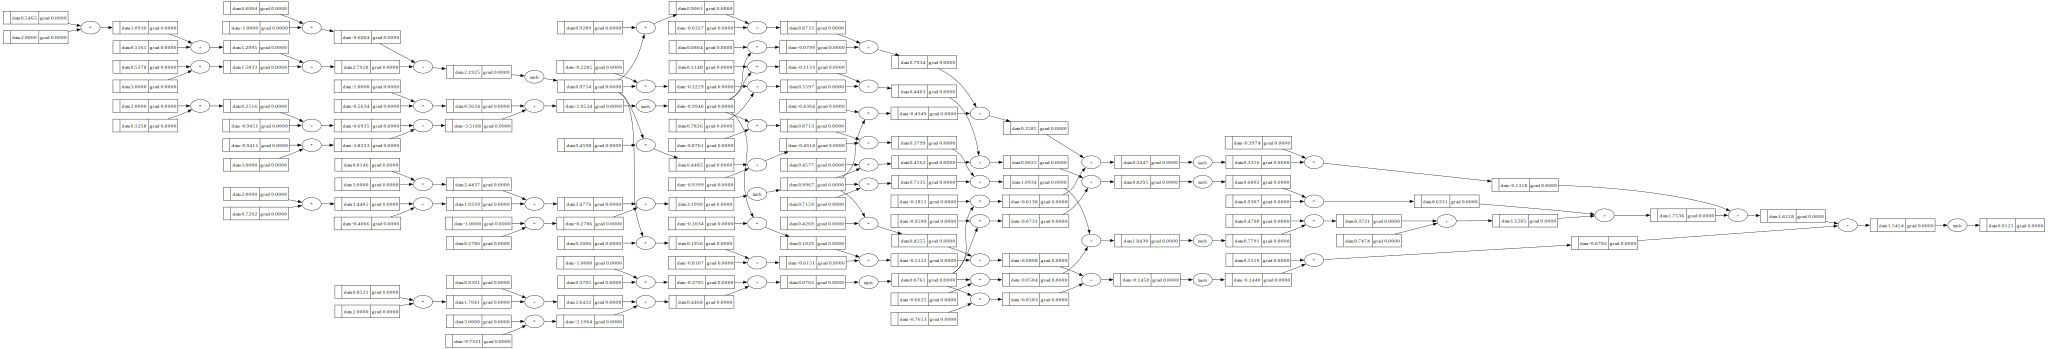

In [90]:
draw_dot(n(x))

In [91]:
# Simple binary classification problem

xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [93]:
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9125268487564145),
 Value(data=-0.0986474886787817),
 Value(data=0.5007209637651301),
 Value(data=0.6271557188021852)]

In [ ]:
# How to tune the weights to better predict
# define a loss, for example mean square loss
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))